In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("analyzed_file.csv")
df1 = df1.sample(60000)

In [3]:
df1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,AgeGroup,IncomeRange
199159,330893,0,1,0,1,1,1,67500.0,202500.0,10125.0,...,0,0,0,1,1,1,30,29.0,0,2
136140,257913,0,0,1,0,1,1,108000.0,569673.0,27837.0,...,0,0,0,0,0,0,13,49.0,2,2
108862,226261,0,0,1,1,0,0,180000.0,545040.0,25407.0,...,0,0,0,0,0,0,5,25.0,0,1
297109,444215,0,0,0,1,1,0,67500.0,226422.0,11691.0,...,0,0,0,0,0,0,5,43.0,2,2
228132,364242,0,0,0,0,1,0,90000.0,239850.0,23494.5,...,0,0,0,0,0,0,33,53.0,3,2


In [4]:
df1.drop(['SK_ID_CURR','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY'], axis =1)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Age,AgeGroup,IncomeRange
199159,0,1,0,1,1,67500.0,202500.0,10125.0,6,4,...,1,11,0,0,1,1,30,29.0,0,2
136140,0,0,1,0,1,108000.0,569673.0,27837.0,6,7,...,1,9,0,0,0,0,13,49.0,2,2
108862,0,0,1,1,0,180000.0,545040.0,25407.0,6,7,...,5,15,0,0,0,0,5,25.0,0,1
297109,0,0,0,1,1,67500.0,226422.0,11691.0,6,7,...,0,9,0,0,0,0,5,43.0,2,2
228132,0,0,0,0,1,90000.0,239850.0,23494.5,6,7,...,1,10,0,0,0,0,33,53.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52397,0,0,0,0,1,135000.0,640080.0,31261.5,6,7,...,5,16,0,0,0,0,20,48.0,2,0
184541,0,0,0,0,1,126000.0,88884.0,5809.5,6,7,...,5,10,0,0,0,0,28,43.0,2,0
30842,0,0,1,0,1,90000.0,314055.0,16164.0,6,7,...,0,10,0,1,0,0,40,43.0,2,2
25956,1,0,0,0,0,54000.0,271957.5,19341.0,6,3,...,6,10,0,0,0,0,57,59.0,3,2


In [5]:
x = df1.drop(['TARGET'],axis = 1)
y = df1['TARGET']

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math
from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTEENN

### Train test split

In [7]:
x_train_res,x_test,y_train_res,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [8]:
sm = SMOTEENN()    #oversampling
x_train_res , y_train_res = sm.fit_resample(x_train_res,y_train_res)
y_train_res.value_counts()

1    33368
0    23433
Name: TARGET, dtype: int64

### Logistic Regression

In [9]:
model_LogR = LogisticRegression()
model_LogR.fit(x_train_res,y_train_res)

LogisticRegression()

In [10]:
model_LogR.intercept_

array([3.58197648e-08])

In [11]:
y_predictLogR = model_LogR.predict(x_test)

In [12]:
model_scoreLogR =  model_LogR.score(x_train_res, y_train_res)  #training accuracy
model_scoreLogR 

0.6383338321508424

In [13]:
model_LogR.score(x_test , y_test)        #Testing accuracy

0.37072222222222223

In [14]:
print(classification_report(y_test,y_predictLogR))

              precision    recall  f1-score   support

           0       0.95      0.33      0.49     16546
           1       0.09      0.78      0.17      1454

    accuracy                           0.37     18000
   macro avg       0.52      0.56      0.33     18000
weighted avg       0.88      0.37      0.47     18000



In [15]:
confusion_matrixLR = confusion_matrix(y_test,y_predictLogR)
print(confusion_matrixLR)

[[ 5537 11009]
 [  318  1136]]


<AxesSubplot:>

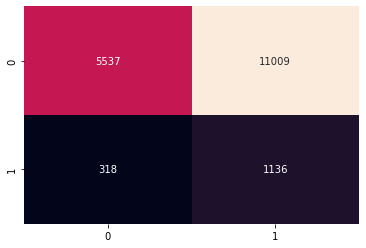

In [16]:
sns.heatmap(confusion_matrixLR, annot=True, fmt = 'd', cbar = False)

In [17]:
auc = roc_auc_score(y_test,y_predictLogR)
auc

0.5579678994212458

### SVC

In [18]:
model_SVC = SVC(C=200,gamma=1)
model_SVC.fit(x_train_res,y_train_res)

SVC(C=200, gamma=1)

In [19]:
y_predictSVC = model_SVC.predict(x_test)

In [20]:
model_scoreSVC =  model_SVC.score(x_train_res , y_train_res)  #training accuracy
model_scoreSVC

1.0

In [21]:
model_SVC.score(x_test , y_test)        #Testing accuracy

0.08077777777777778

In [22]:
print(classification_report(y_test,y_predictSVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16546
           1       0.08      1.00      0.15      1454

    accuracy                           0.08     18000
   macro avg       0.04      0.50      0.07     18000
weighted avg       0.01      0.08      0.01     18000



C:\Users\sneha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sneha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
confusion_matrixSVC = metrics.confusion_matrix(y_test,y_predictSVC)
print(confusion_matrixSVC)

[[    0 16546]
 [    0  1454]]


<AxesSubplot:>

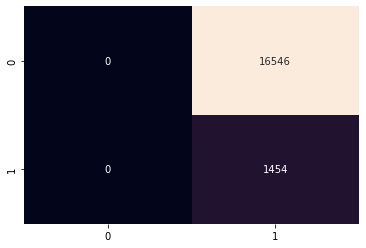

In [24]:
sns.heatmap(confusion_matrixSVC, annot=True, fmt = 'd', cbar = False)

### Random Forest Classifier

In [25]:
model_RF = RandomForestClassifier(n_estimators=105,criterion='gini',random_state=100,max_depth=11,min_samples_leaf=11)

In [26]:
model_RF.fit(x_train_res , y_train_res)

RandomForestClassifier(max_depth=11, min_samples_leaf=11, n_estimators=105,
                       random_state=100)

In [27]:
y_predictRF = model_RF.predict(x_test)

In [28]:
model_scoreRF = model_RF.score(x_train_res , y_train_res) #training accuracy
model_scoreRF

0.8774845513283217

In [29]:
model_RF.score(x_test,y_test)              #testing accuracy

0.7393888888888889

In [30]:
print(classification_report(y_test,y_predictRF))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     16546
           1       0.11      0.33      0.17      1454

    accuracy                           0.74     18000
   macro avg       0.52      0.55      0.51     18000
weighted avg       0.86      0.74      0.79     18000



In [31]:
confusion_matrixRF = metrics.confusion_matrix(y_test,y_predictRF)
print(confusion_matrixRF)

[[12829  3717]
 [  974   480]]


<AxesSubplot:>

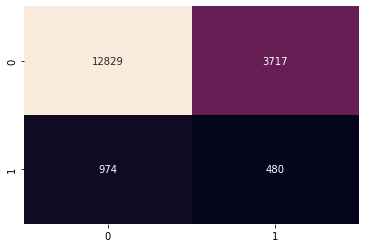

In [32]:
sns.heatmap(confusion_matrixRF, annot=True, fmt = 'd', cbar = False)

### Decision Tree Classifier

In [33]:
model_DT = DecisionTreeClassifier(criterion="gini",random_state=42,max_depth = 11, min_samples_leaf = 12)

In [34]:
model_DT.fit(x_train_res , y_train_res)
y_predictDT = model_DT.predict(x_test)

In [35]:
model_scoreDT = model_DT.score(x_train_res , y_train_res)
model_scoreDT

0.843136564497104

In [36]:
print(classification_report(y_test,y_predictDT))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     16546
           1       0.11      0.28      0.16      1454

    accuracy                           0.76     18000
   macro avg       0.52      0.54      0.51     18000
weighted avg       0.86      0.76      0.80     18000



In [37]:
confusion_matrix = confusion_matrix(y_test,y_predictDT)
print(confusion_matrix)

[[13187  3359]
 [ 1041   413]]


<AxesSubplot:>

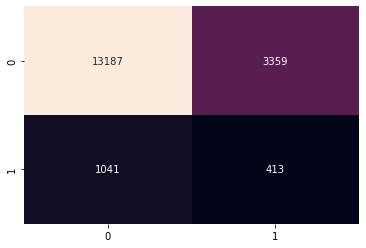

In [38]:
sns.heatmap(confusion_matrix, annot=True, fmt = 'd', cbar = False)

In [39]:
model_DT.score(x_train_res , y_train_res)

0.843136564497104

In [40]:
model_DT.score(x_test,y_test)  

0.7555555555555555

Text(0, 0.5, 'True Positive Rate')

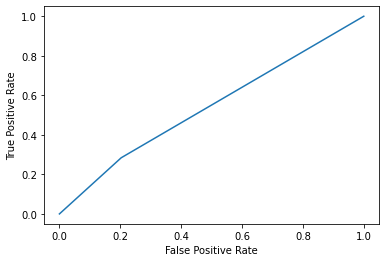

In [41]:
fpr,tpr,thresholds = roc_curve(y_test,y_predictDT)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### XGBoost

In [45]:
model_XGB = xgb.XGBClassifier(n_estimators = 50, max_depth = 20,learning_rate = 0.5)
model_XGB.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
y_predictXGB = model_XGB.predict(x_test)

In [47]:
model_scoreXGB = model_XGB.score(x_train_res , y_train_res) #training accuracy
model_scoreXGB

1.0

In [48]:
model_XGB.score(x_test,y_test)                                #Testing accuracy

0.8912222222222222

In [49]:
confusion_matrixXGB = metrics.confusion_matrix(y_test,y_predictXGB)
print(confusion_matrixXGB)

[[15925   621]
 [ 1337   117]]


<AxesSubplot:>

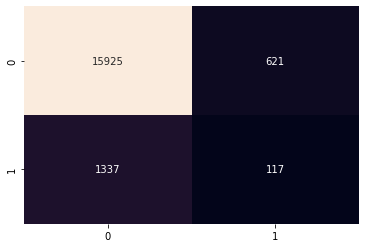

In [50]:
sns.heatmap(confusion_matrixXGB, annot=True, fmt = 'd', cbar = False)

In [51]:
print(classification_report(y_test,y_predictXGB))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     16546
           1       0.16      0.08      0.11      1454

    accuracy                           0.89     18000
   macro avg       0.54      0.52      0.52     18000
weighted avg       0.86      0.89      0.87     18000



### Bernoulli Naive Bayes algorithm

In [52]:
model_Naive =   BernoulliNB()
model_Naive.fit(x_train_res,y_train_res)

BernoulliNB()

In [53]:
y_predictNaive = model_Naive.predict(x_test)

In [54]:
model_scoreNaive = model_Naive.score(x_train_res , y_train_res) #training accuracy
model_scoreNaive

0.699723596415556

In [55]:
model_Naive.score(x_test,y_test)                                #Testing accuracy

0.49577777777777776

In [56]:
print(classification_report(y_test,y_predictNaive))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64     16546
           1       0.08      0.51      0.14      1454

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.39     18000
weighted avg       0.85      0.50      0.60     18000



In [57]:
confusion_matrixNaive = metrics.confusion_matrix(y_test,y_predictNaive)
print(confusion_matrixNaive)

[[8181 8365]
 [ 711  743]]


<AxesSubplot:>

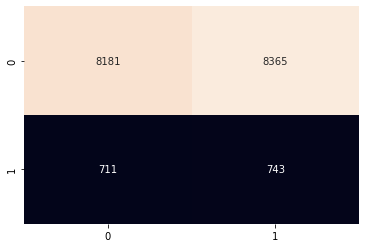

In [58]:
sns.heatmap(confusion_matrixNaive, annot=True, fmt = 'd', cbar = False)

### KNeighborsClassifier

In [59]:
model_KNN =  KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train_res,y_train_res)

KNeighborsClassifier()

In [60]:
y_predictKNN = model_KNN.predict(x_test)

In [61]:
model_scoreKNN = model_KNN.score(x_train_res , y_train_res) #training accuracy
model_scoreKNN

0.9827995985986162

In [62]:
model_KNN.score(x_test,y_test)                                #Testing accuracy

0.5788333333333333

In [63]:
print(classification_report(y_test,y_predictKNN))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72     16546
           1       0.09      0.47      0.15      1454

    accuracy                           0.58     18000
   macro avg       0.51      0.53      0.44     18000
weighted avg       0.86      0.58      0.67     18000



In [64]:
confusion_matrixKNN = metrics.confusion_matrix(y_test,y_predictKNN)
print(confusion_matrixKNN)

[[9742 6804]
 [ 777  677]]


<AxesSubplot:>

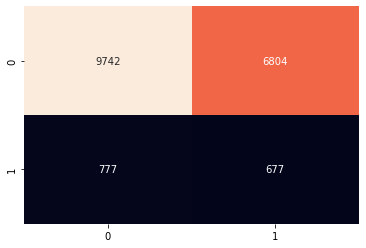

In [65]:
sns.heatmap(confusion_matrixKNN, annot=True, fmt = 'd', cbar = False)

### Gaussian Naive Bayes algorithm

In [66]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_res,y_train_res)

GaussianNB()

In [67]:
y_predictGNB = model_GNB.predict(x_test)

In [68]:
model_scoreGNB = model_GNB.score(x_train_res , y_train_res) #training accuracy
model_scoreGNB

0.6406929455467333

In [69]:
model_GNB.score(x_test,y_test)                                #Testing accuracy

0.4035

In [70]:
print(classification_report(y_test,y_predictGNB))

              precision    recall  f1-score   support

           0       0.94      0.37      0.54     16546
           1       0.09      0.74      0.17      1454

    accuracy                           0.40     18000
   macro avg       0.52      0.56      0.35     18000
weighted avg       0.87      0.40      0.51     18000



In [71]:
confusion_matrixGNB = metrics.confusion_matrix(y_test,y_predictGNB)
print(confusion_matrixGNB)

[[ 6186 10360]
 [  377  1077]]


<AxesSubplot:>

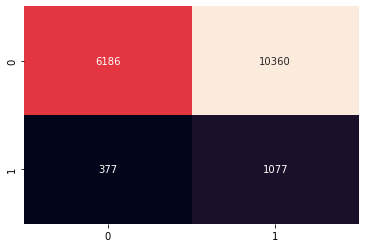

In [72]:
sns.heatmap(confusion_matrixGNB, annot=True, fmt = 'd', cbar = False)